In [19]:
# Bibliotecas para modelagem de dados 
import pandas as pd 

# Biblioteca para recursos matemáticos 
import numpy as np 

# Biblioteca para recursos gráficos 
import matplotlib.pyplot as plt

In [20]:
# Criando nossa base de dados 
# Base de preço de apartamento fictícia 

# Criando lista com os valores 
metragem = [40,45,50,55,60,62,65,70,80,90,92,100,110,120,150]
valor = [200,280,310,350,390,410,450,490,550,620,670,700,750,810,989]

# Organizando os valores em um dicionário
dicionario = {'metragem':metragem,'valor imovel':valor}

# Lendo o dicionario com o pandas 
dataframe = pd.DataFrame(data=dicionario)

# Verificando as primeiras linhas 
dataframe.head()

,metragem,valor imovel
0,40,200
1,45,280
2,50,310
3,55,350
4,60,390


Text(0, 0.5, 'Valor do imovel')

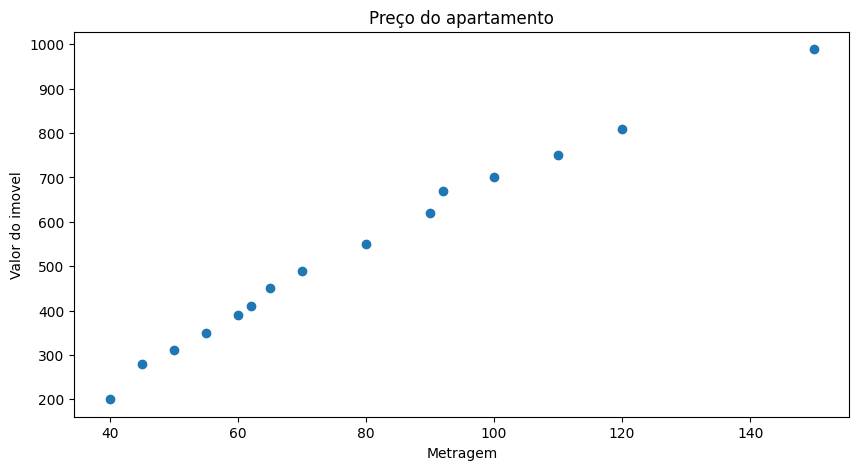

In [21]:
# Plotagem dos dados

# Ajustando o tamanho do gráfico
plt.figure(figsize=(10,5))

# Passando os valores para o gráfico 
plt.scatter(dataframe['metragem'].values, dataframe['valor imovel'].values)

# Definindo um titulo 
plt.title('Preço do apartamento')

# Definindo o nome do eixo x 
plt.xlabel('Metragem')

# Definindo o nome do eixo y
plt.ylabel('Valor do imovel')

In [22]:
# Separando os dados no eixo x e y 
eixo_x = dataframe.iloc[:,0].values
eixo_y = dataframe.iloc[:,1].values

# Calculando a correlação entre os dados usando o Numpy 
correlacao = np.corrcoef(eixo_x,eixo_y)
correlacao

array([[1.        , 0.99320395],
       [0.99320395, 1.        ]])

In [23]:
# Convertendo o eixo x para o formato de matriz 
# -1 quer dizer para não mexer nas linhas,
# 1 quer dizer para incluir uma coluna 

eixo_x = eixo_x.reshape(-1,1)

In [24]:
# pip install scikit-learn

In [25]:
# Importando a biblioteca com os recursos da regressão linear 
from sklearn.linear_model import LinearRegression

# Definindo uma variável com os calculos estatisticos 
regressor = LinearRegression()

# Passando os dados para treinar o modelo
regressor.fit(eixo_x,eixo_y)

# Identificando o b0 e b1 - Referencia da formula da regressao linear 
b1 = regressor.coef_ # coeficiente 
b0 = regressor.intercept_ # Constante 

# Mostrando os valores
print('b0 =',b0,'\n','b1 =',b1[0])


b0 = -32.38752208173719 
 b1 = 7.110860244933606


In [26]:
# Calculando o score da regressão 
score = regressor.score(eixo_x,eixo_y)
score

0.9864540901286758

Text(0, 0.5, 'Valor do imóvel')

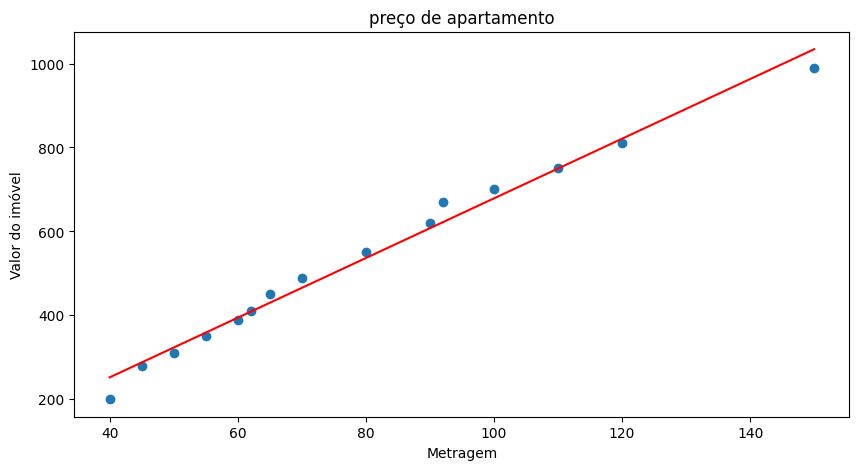

In [27]:
# Plotagem da reta 

# Ajustando o tamanho do gráfico 
plt.figure(figsize = (10,5))

# Passando os valores para o grafico 
plt.scatter(dataframe['metragem'].values,dataframe['valor imovel'].values)

# Plotando a reta gerada pela regressão 
plt.plot(eixo_x, regressor.predict(eixo_x),color='red')

# Definindo um titulo 
plt.title('preço de apartamento')

# Definindo o nome do eixo x 
plt.xlabel('Metragem')

# Definindo o nome do eixo y
plt.ylabel('Valor do imóvel')


In [28]:
# Fazendo previsões 

# Vamos prever o valor de um apartamento de 50 metros 
qual_tamanho_apartamento = [[50]]

# Prevendo quanto custaria o valor de um apartamento
previsao = regressor.predict(qual_tamanho_apartamento)

print(f'Um apartamento de: {qual_tamanho_apartamento[0][0]} metros,\n usando o modelo para prever o valor, custaria R$ {round(previsao[0],2)}')

Um apartamento de: 50 metros,
 usando o modelo para prever o valor, custaria R$ 323.16
